# Loan Approval Prediction

### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

### Data collection and processing

In [2]:
#load dataset
df = pd.read_csv('dataset/loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [3]:
df.shape

(381, 13)

In [4]:
#first 5 rows
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [5]:
#lastr 5 rows
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
#features/columns
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [8]:
#total missing values
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

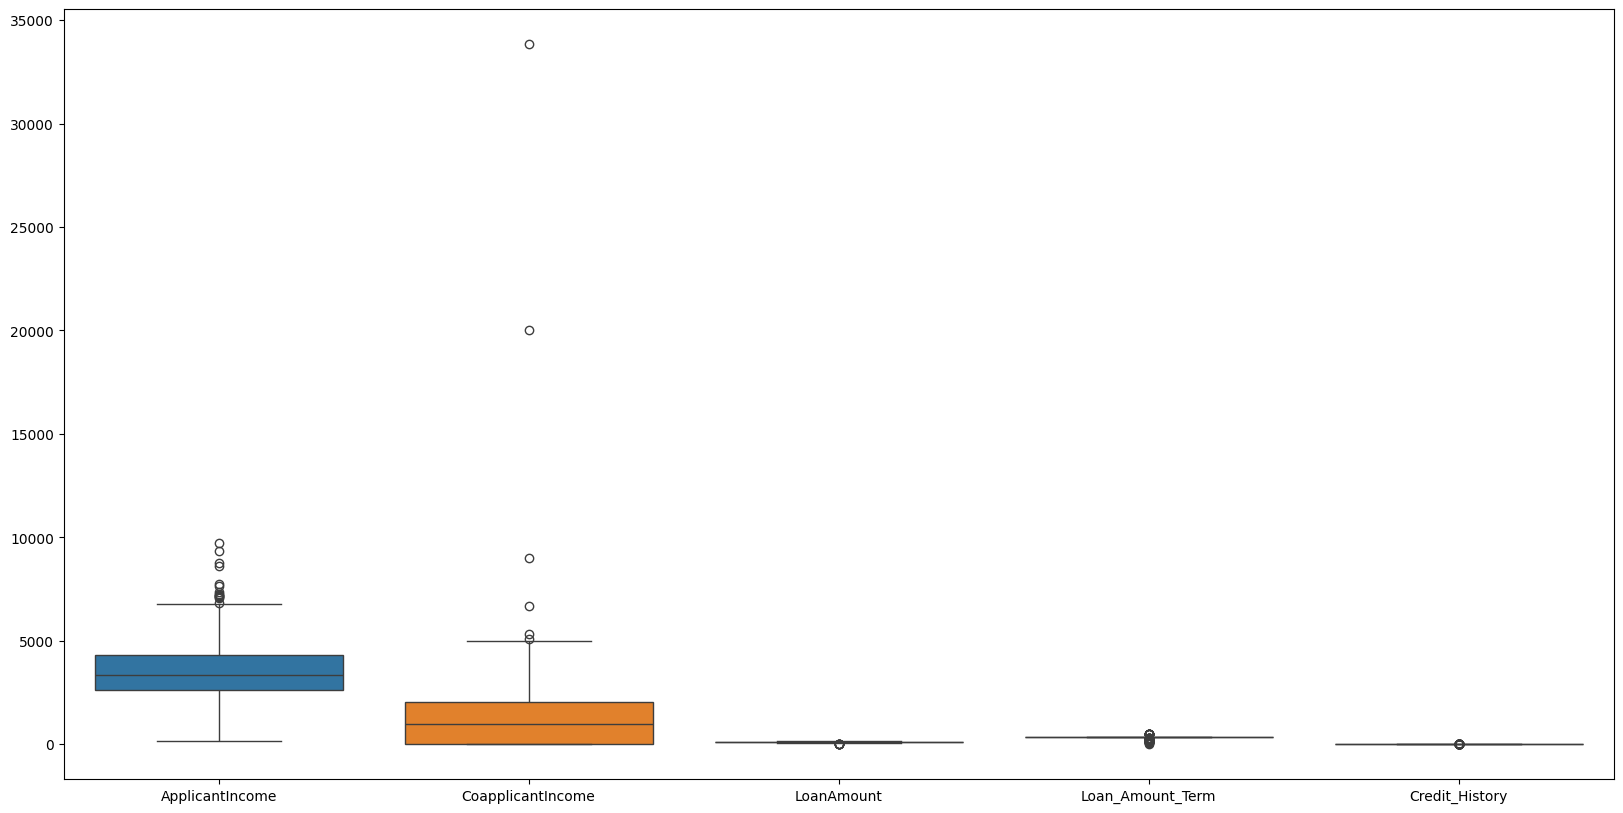

In [9]:
#check outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

In [10]:
#filling null values of numerical datatype
#median is less sensitive to outliers and mean is more sensitive to outliers
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [11]:
df['LoanAmount'].median()

110.0

In [12]:
df['LoanAmount'].mean()

104.98687664041995

In [13]:
#filling null values of object datatype
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])


In [14]:
df['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [15]:
df['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [16]:
df['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Data visualization

number of people who took loan by gender
Gender
Male      296
Female     85
Name: count, dtype: int64


C:\Users\gladw\AppData\Local\Temp\ipykernel_24492\3734075083.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='hsv')


<Axes: xlabel='Gender', ylabel='count'>

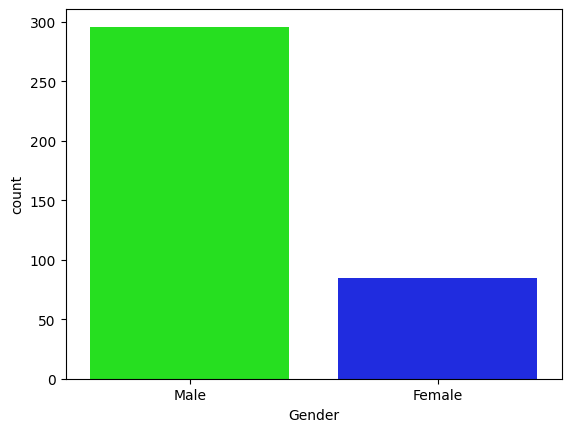

In [20]:
print('number of people who took loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette='hsv')

number of people who took loan by martial status
Married
Yes    228
No     153
Name: count, dtype: int64


C:\Users\gladw\AppData\Local\Temp\ipykernel_24492\1292789182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Married', data=df, palette='hsv')


<Axes: xlabel='Married', ylabel='count'>

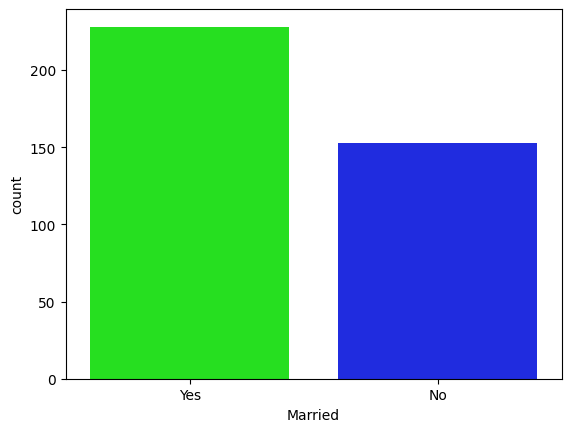

In [21]:
print('number of people who took loan by martial status')
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette='hsv')

number of people who took loan by education
Education
Graduate        278
Not Graduate    103
Name: count, dtype: int64


C:\Users\gladw\AppData\Local\Temp\ipykernel_24492\1368828941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=df, palette='hsv')


<Axes: xlabel='Education', ylabel='count'>

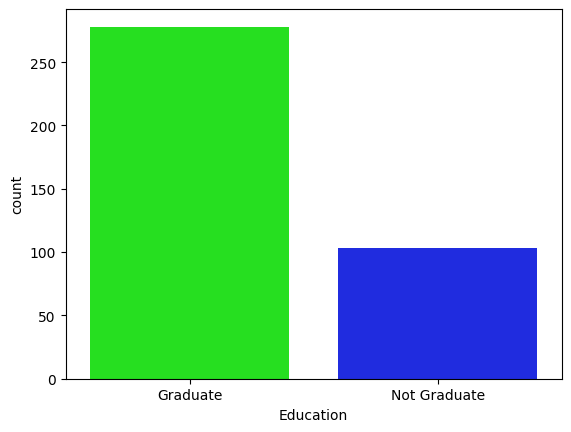

In [22]:
print('number of people who took loan by education')
print(df['Education'].value_counts())
sns.countplot(x='Education', data=df, palette='hsv')

### Correlation

In [26]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculate correlation
corr = numeric_df.corr()

# Display the correlation matrix
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.248693,0.270681,-0.107705,0.004444
CoapplicantIncome,-0.248693,1.000000,0.114936,0.001893,0.022630
LoanAmount,0.270681,0.114936,1.000000,0.122913,-0.046473
Loan_Amount_Term,-0.107705,0.001893,0.122913,1.000000,-0.011864
Credit_History,0.004444,0.022630,-0.046473,-0.011864,1.000000


<Axes: >

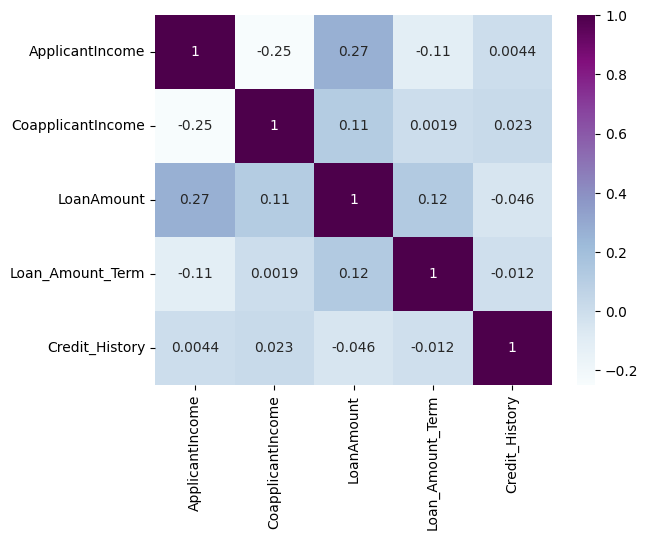

In [35]:
sns.heatmap(corr, annot=True, cmap='BuPu')

## Feature Enginerring

In [36]:
# Total applicant income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [37]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0


## Log transformation

C:\Users\gladw\AppData\Local\Temp\ipykernel_24492\3953095586.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncomeLog'])


<Axes: xlabel='ApplicantIncomeLog', ylabel='Density'>

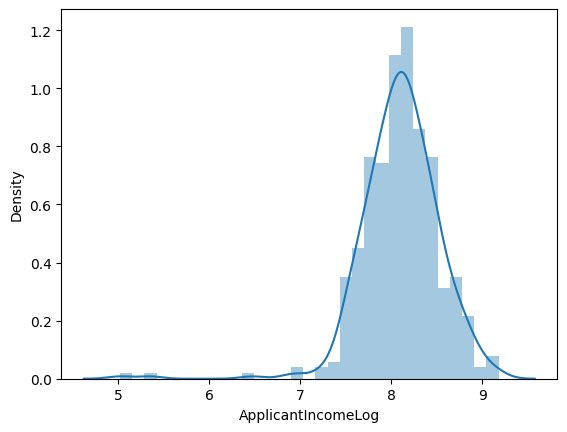

In [42]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'] + 1)    
sns.distplot(df['ApplicantIncomeLog'])


In [43]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0,7.755339


C:\Users\gladw\AppData\Local\Temp\ipykernel_24492\44966459.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LoanAmountLog'])


<Axes: xlabel='LoanAmountLog', ylabel='Density'>

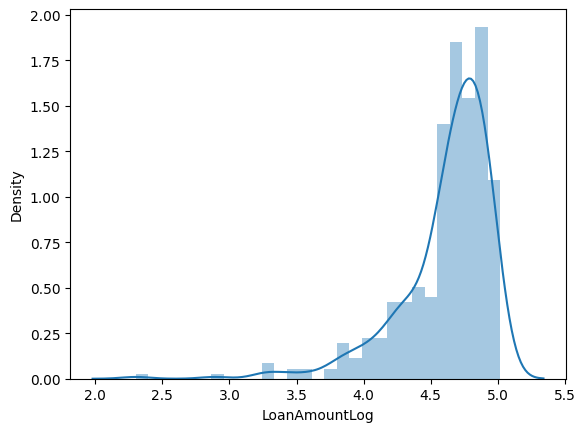

In [44]:
df['LoanAmountLog'] = np.log(df['LoanAmount'] + 1)    
sns.distplot(df['LoanAmountLog'])


C:\Users\gladw\AppData\Local\Temp\ipykernel_24492\3900776630.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Loan_Amount_Term_Log'])


<Axes: xlabel='Loan_Amount_Term_Log', ylabel='Density'>

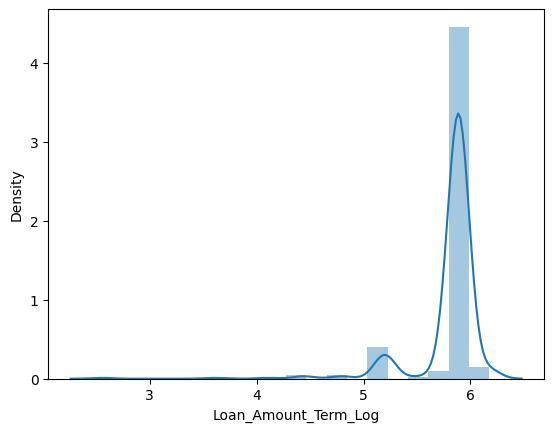

In [45]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'] + 1)    
sns.distplot(df['Loan_Amount_Term_Log'])

C:\Users\gladw\AppData\Local\Temp\ipykernel_24492\2252544831.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Income_Log'])


<Axes: xlabel='Total_Income_Log', ylabel='Density'>

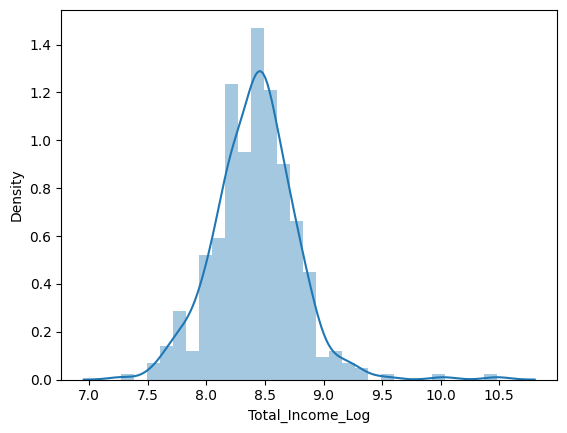

In [46]:
df['Total_Income_Log'] = np.log(df['Total_Income'] + 1)    
sns.distplot(df['Total_Income_Log'])

In [47]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,3849.0,7.755339,4.564348,5.888878,8.255828


In [50]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'ApplicantIncomeLog', 'LoanAmountLog',
       'Loan_Amount_Term_Log', 'Total_Income_Log'],
      dtype='object')


In [51]:
#remove unwanted columns
cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Total_Income']
df = df.drop(columns=cols, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
1,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
2,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
3,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681
4,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.755339,4.564348,5.888878,8.255828


## Encoding: Label Encoding

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
cols = ['Gender', 'Married', 'Dependents','Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
    

In [55]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
1,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
2,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
3,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681
4,1,1,0,1,0,1.0,2,1,7.755339,4.564348,5.888878,8.255828


In [56]:
df.dtypes

Gender                    int32
Married                   int32
Dependents                int32
Education                 int32
Self_Employed             int32
Credit_History          float64
Property_Area             int32
Loan_Status               int32
ApplicantIncomeLog      float64
LoanAmountLog           float64
Loan_Amount_Term_Log    float64
Total_Income_Log        float64
dtype: object

## Split Independent features and dependent features

In [57]:
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [58]:
x

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
1,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
2,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
3,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
4,1,1,0,1,0,1.0,2,7.755339,4.564348,5.888878,8.255828
...,...,...,...,...,...,...,...,...,...,...,...
376,1,1,3,0,0,1.0,2,8.648923,4.859812,5.888878,8.648923
377,1,1,0,0,0,1.0,0,8.081166,4.691348,5.888878,8.553139
378,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
379,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448


In [59]:
y

0      0
1      1
2      1
3      1
4      1
      ..
376    1
377    1
378    1
379    1
380    0
Name: Loan_Status, Length: 381, dtype: int32

## Model creation

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### Logistic regression model

In [66]:
# Create a pipeline that first standardizes the data then creates a logistic regression model
model_1 = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

model_1.fit(x_train, y_train)
y_pred = model_1.predict(x_test)
print('Accuracy of Logistic Regression:', accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression: 0.8229166666666666


In [69]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of Logistic Regression:', accuracy)

Accuracy of Logistic Regression: 82.29166666666666


In [68]:
score = cross_val_score(model_1, x, y, cv=5)
score

array([0.84415584, 0.81578947, 0.81578947, 0.89473684, 0.85526316])

In [70]:
np.mean(score)*100

84.51469583048532

### Random Forest Classifier model

In [72]:
model_2 = make_pipeline(StandardScaler(), RandomForestClassifier())
model_2.fit(x_train, y_train)
y_pred = model_2.predict(x_test)
print('Accuracy of Random Forest Classifier:', accuracy_score(y_test, y_pred)*100)

Accuracy of Random Forest Classifier: 82.29166666666666


In [73]:
score = cross_val_score(model_2, x, y, cv=5)
print('Accuracy of Random Forest Classifier:', np.mean(score)*100)

Accuracy of Random Forest Classifier: 83.73547505126453


### Decision Tree Classifier model

In [74]:
model_3 = make_pipeline(StandardScaler(), DecisionTreeClassifier())
model_3.fit(x_train, y_train)
y_pred = model_3.predict(x_test)
print('Accuracy of Decision Tree Classifier:', accuracy_score(y_test, y_pred)*100)

Accuracy of Decision Tree Classifier: 65.625


In [75]:
score = cross_val_score(model_3, x, y, cv=5)
print('Accuracy of Decision Tree Classifier:', np.mean(score)*100)

Accuracy of Decision Tree Classifier: 76.91045796308954


### KNeighbour Classifier

In [77]:
model_4 = make_pipeline(StandardScaler(), KNeighborsClassifier())
model_4.fit(x_train, y_train)
y_pred = model_4.predict(x_test)
print('Accuracy of KNeighbors Classifier:', accuracy_score(y_test, y_pred)*100)

Accuracy of KNeighbors Classifier: 77.08333333333334


In [78]:
score = cross_val_score(model_4, x, y, cv=5)
print('Accuracy of KNeighbors Classifier:', np.mean(score)*100)

Accuracy of KNeighbors Classifier: 83.19207108680793
